# Iris-datan luokittelu kerasilla
Tavoitteena on luoda kerasilla yksinkertainen neuroverkko, joka pystyy luokittelemaan Iris-datan kolmeen eri lajiin.

## Datan esi-käsittely
Iris-data ladataan ja sekoitetaan satunnaisesti. Tämän jälkeen datasta erotetaan syötteet X ja tulosteet y.

In [138]:
import pandas as pd
import numpy as np

column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=column_names)
data = pd.get_dummies(data, columns=['species'], dtype=int)

data = data.to_numpy()
np.random.shuffle(data)

X = data[:, :4]
y = data[:, 4:]

## Mallin rakentaminen
Malli koostuu kolmesta kerroksesta:
- Sisääntulokerros, joka on 4 solua
- Piilokerros, jossa on 16 solua ja relu-aktivaatiofunktio
- Lähtökerros, jossa on 3 solua ja softmax-aktivaatiofunktio

Käytin optimointialgoritmina SGD:tä, koska se näytti tuottavan hyviä ja tasaisia tuloksia muihin optimointialgoritmeihin verrattuna.

In [139]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

model = Sequential([
    Input(shape=(4,)),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X, y, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4063 - loss: 1.5029 - val_accuracy: 0.4000 - val_loss: 1.0003
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3052 - loss: 1.0371 - val_accuracy: 0.4333 - val_loss: 0.8399
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4991 - loss: 0.8263 - val_accuracy: 0.6333 - val_loss: 0.7453
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7428 - loss: 0.7486 - val_accuracy: 0.7667 - val_loss: 0.6842
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7780 - loss: 0.6546 - val_accuracy: 0.9000 - val_loss: 0.6275
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8660 - loss: 0.5714 - val_accuracy: 0.9333 - val_loss: 0.5744
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8971 - loss: 0.5857 - val_accuracy: 0.9000 - val_loss: 0.5546
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9066 - loss: 0.5334 - val_accuracy: 0.7000 - val_loss

## Mallin arvioiminen
Treenaustarkkuuden ja validointitarkkuuden kehitys suhteessa epookkien määrään on esitetty alla. Treenaustarkkuutta esittää sininen viiva ja validointitarkkuutta oranssi viiva.

Mallin treenaustarkkuus on noin 96 % ja validointitarkkuus noin 97 %.

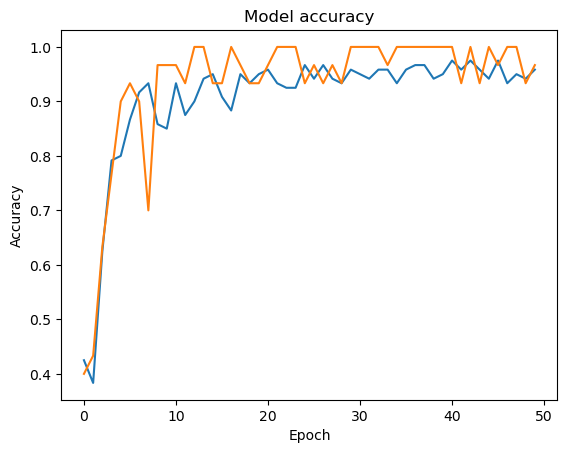

Training accuracy:  0.9583333134651184
Validation accuracy:  0.9666666388511658


In [140]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

print("Training accuracy: ", model.history.history['accuracy'][-1])
print("Validation accuracy: ", model.history.history['val_accuracy'][-1])